# Selecció de Models
En la Demo1 només este en compte la filtració de dades (Tractaments de valors faltants) i eliminació de columnes que no tenen correlació amb el **target = winner**.

- **Model 1:** Elimació de les columnes de la correlació
- **Model 2:** + Elimació de les columnes que determinen quin heroi a acabat amb una estructura
- **Model 3:** + Eliminació dels *first*


**NOTA:** Algunes de les funcions utilitzades estan en el document **funcions.py** per millorar al visualització del NoteBook

In [1]:
# Primer de tot carreguem les llibreries necessàries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

from demo2_funcions import *
from Combinacions_herois import *
from funcions import *

In [2]:
# Regressió logística
from sklearn.linear_model import LogisticRegression
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
# SVM
from sklearn.svm import SVC

In [3]:
DataSet = pd.read_csv('../../LOL - Dataset/games.csv')

print("📊 RESUM DE LES DADES ORIGINALS:")
print(f"Files: {DataSet.shape[0]}, Columnes: {DataSet.shape[1]}")
print(f"\nValors NaN totals: {DataSet.isna().sum().sum()}")
print(f"Files amb NaN: {DataSet.isna().any(axis=1).sum()}")

# Eliminar duplicats
duplicated_rows = DataSet[DataSet.duplicated(keep=False)]
print(f"\n📋 Nombre de files duplicades: {len(duplicated_rows)} de {len(DataSet)}")
DataSet_cleaned = DataSet.drop_duplicates()
print(f"✅ Files després d'eliminar duplicats: {len(DataSet_cleaned)}")

📊 RESUM DE LES DADES ORIGINALS:
Files: 51490, Columnes: 61

Valors NaN totals: 0
Files amb NaN: 0

📋 Nombre de files duplicades: 861 de 51490
✅ Files després d'eliminar duplicats: 51053


Com hem determinat al final del document de **Correlació**, eliminarem els atributs que no tenen correlació directa amb el target **winner** i afegirem les columnes comentades en **Combinacions_herois.ipynb**

In [4]:
# Retorna un diccionari per poder descodificar les combinacions d'equips
combinacions_equip = comptar_combinacions_equip(DataSet_cleaned)

# Creem un nou DataFrame amb els index de les combinacions d'equips 1 i 2 
combinacions_equip_list = list(combinacions_equip.keys())
combinacions_equips_df = pd.DataFrame(combinacions_equip_list, columns=['champ1_id', 'champ2_id', 'champ3_id', 'champ4_id', 'champ5_id'])

DataSet_reduit = afegir_combinacions_equips_a_dataset(
    df=DataSet_cleaned,
    combinacions_equips_df=combinacions_equips_df,
)

c:\Users\laiao\OneDrive\Desktop\UNI\3. Aprenentatge Computacional\Kaggle-Code\Selecció de Model\Demo2\Combinacions_herois.py:1820: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team1_comb_index'] = keys1.map(_key_to_index).astype('Int64')
c:\Users\laiao\OneDrive\Desktop\UNI\3. Aprenentatge Computacional\Kaggle-Code\Selecció de Model\Demo2\Combinacions_herois.py:1821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team2_comb_index'] = keys2.map(_key_to_index).astype('Int64')


In [5]:
DataSet_amb_sinergia, sinergia_df = implementar_sinergia_model(DataSet_reduit, combinacions_equips_df)
DataSet_cleaned = implementar_tags_model(DataSet_amb_sinergia, DataSet_reduit, combinacions_equips_df, min_partides=5)

🚀 Carregant JSON per PRIMERA vegada...
ANÀLISI DE SINERGIA ENTRE HEROIS

Parelles analitzades: 9407

TOP 10 PARELLES AMB MILLOR SINERGIA:
--------------------------------------------------
Nidalee         + Shyvana         | WR: 92.86% | Sinergia: 0.846 | Aparicions: 14
Graves          + Hecarim         | WR: 85.00% | Sinergia: 0.759 | Aparicions: 10
Nocturne        + Aurelion Sol    | WR: 84.21% | Sinergia: 0.732 | Aparicions: 19
Kassadin        + Udyr            | WR: 84.21% | Sinergia: 0.732 | Aparicions: 19
Mordekaiser     + Camille         | WR: 93.75% | Sinergia: 0.714 | Aparicions: 8
Karthus         + Xerath          | WR: 88.89% | Sinergia: 0.713 | Aparicions: 9
Warwick         + Rek'Sai         | WR: 88.89% | Sinergia: 0.713 | Aparicions: 9
Rumble          + Skarner         | WR: 88.89% | Sinergia: 0.713 | Aparicions: 9
Malphite        + Nocturne        | WR: 82.14% | Sinergia: 0.706 | Aparicions: 28
Anivia          + Aatrox          | WR: 81.82% | Sinergia: 0.702 | Aparicions

In [6]:
# Eliminació columnes determinades per la primera correlació
cols_to_remove = [f't{team}_champ{i}id' for team in [1, 2] for i in range(1, 6)]
cols_to_remove += [f't{team}_champ{champ}_sum{s}' for team in [1, 2] for champ in range(1, 6) for s in [1,2]]
cols_to_remove += [f't{team}_ban{champ}' for team in [1, 2] for champ in range(1, 6)]
cols_to_remove += ['creationTime', 'gameDuration', 'seasonId']


# Eliminació de columnes que determinen quins herois de cada equip a acabat amb una estructura
cols_to_remove  += ['t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills',
                    't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']


# Verificar quines columnes existeixen
existing_cols = [col for col in cols_to_remove if col in DataSet_cleaned.columns]
DataSet_cleaned = DataSet_cleaned.drop(columns=existing_cols, errors='ignore')
print(f"Columnes restants: {DataSet_cleaned.shape[1]}")

DataSet_cleaned = DataSet_cleaned.dropna()


Columnes restants: 16


## Preparació de les dades d'entrenament i predicció
A continuació farem la validació creuada i la selecció dels hiperparàmetres

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def split_data(X, y, test_size=0.2, val_size=0.2, random_state=42):
    """
    Separa les dades en train, validation i test
    """
    # Primer separació: train+val (80%) i test (20%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Segona separació: train (60%) i val (20%)
    val_relative_size = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_relative_size, 
        random_state=random_state, stratify=y_train_val
    )
    
    print(f"Train shape: {X_train.shape}")
    print(f"Validation shape: {X_val.shape}")
    print(f"Test shape: {X_test.shape}")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

def scale_data(X_train, X_val, X_test, method='standard'):
    """
    Normalitza/estandarditza les dades
    """
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Mètode ha de ser 'standard' o 'minmax'")
    
    # Entrenar el scaler només amb les dades d'entrenament
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


In [8]:
X = DataSet_cleaned.drop('winner', axis=1)
y = DataSet_cleaned['winner']

print(f"\n🎯 DATES PER A MODELACIÓ:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nDistribució de la variable objectiu:")
print(y.value_counts(normalize=True))
y = y.map({1: 0, 2: 1})


🎯 DATES PER A MODELACIÓ:
X shape: (50626, 15)
y shape: (50626,)

Distribució de la variable objectiu:
winner
1    0.506637
2    0.493363
Name: proportion, dtype: float64


In [9]:
# Separar dades
print(f"\n{'='*60}")
print("SEPARANT LES DADES (Train/Val/Test)")
print(f"{'='*60}")
X_train, X_val, X_test, y_train, y_val, y_test = split_data(
    X, y, test_size=0.2, val_size=0.2
)

# Escalar dades
print(f"\n{'='*60}")
print("NORMALITZANT LES DADES")
print(f"{'='*60}")
X_train_scaled, X_val_scaled, X_test_scaled, scaler = scale_data(
    X_train, X_val, X_test, method='standard'
)


SEPARANT LES DADES (Train/Val/Test)
Train shape: (30375, 15)
Validation shape: (10125, 15)
Test shape: (10126, 15)

NORMALITZANT LES DADES



MODEL 1: REGRESSIÓ LOGÍSTICA

VALIDACIÓ CREUADA EXHAUSTIVA (CV=5)

📊 RESULTATS PER CADA MÈTRICA:

  ACCURACY     (Test):
    • Scores per fold: ['0.8227', '0.8321', '0.8260', '0.8234', '0.8229']
    • Mitjana: 0.8254 ± 0.0035
    • IC 95%: [0.8185, 0.8324]
    • Train vs Test gap: -0.0001 (OK)

  F1           (Test):
    • Scores per fold: ['0.8183', '0.8287', '0.8218', '0.8180', '0.8159']
    • Mitjana: 0.8206 ± 0.0045
    • IC 95%: [0.8117, 0.8294]
    • Train vs Test gap: -0.0002 (OK)

  PRECISION    (Test):
    • Scores per fold: ['0.8276', '0.8341', '0.8304', '0.8320', '0.8374']
    • Mitjana: 0.8323 ± 0.0033
    • IC 95%: [0.8258, 0.8388]
    • Train vs Test gap: 0.0002 (OK)

  RECALL       (Test):
    • Scores per fold: ['0.8091', '0.8235', '0.8135', '0.8045', '0.7955']
    • Mitjana: 0.8092 ± 0.0093
    • IC 95%: [0.7910, 0.8274]
    • Train vs Test gap: -0.0007 (OK)

  ROC_AUC      (Test):
    • Scores per fold: ['0.8735', '0.8821', '0.8727', '0.8738', '0.8706']
    • Mitjana

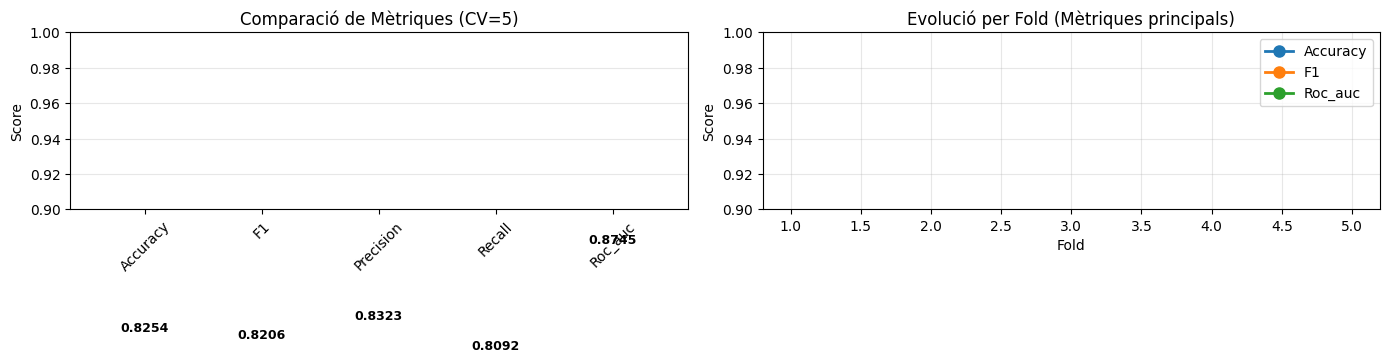

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Millors paràmetres: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 1000, 'C': 10}
Millor score (CV) [accuracy]: 0.8255

AVALUACIÓ DEL MODEL: Regressió Logística (Val)
Valors únics a y_test: [0 1]


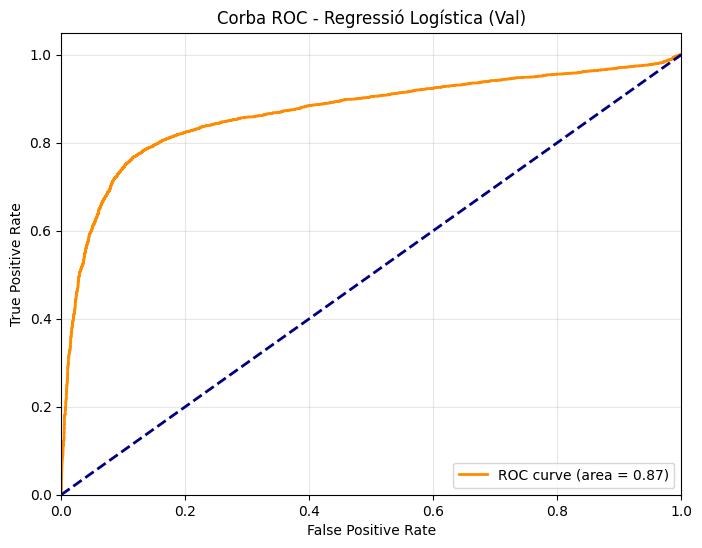


📊 MÈTRIQUES D'AVALUACIÓ:
Accuracy: 0.8200
Precision: 0.8248
Recall: 0.8066
F1-Score: 0.8156
ROC-AUC: 0.8687

📊 Matriu de Confusió:
[[4274  856]
 [ 966 4029]]


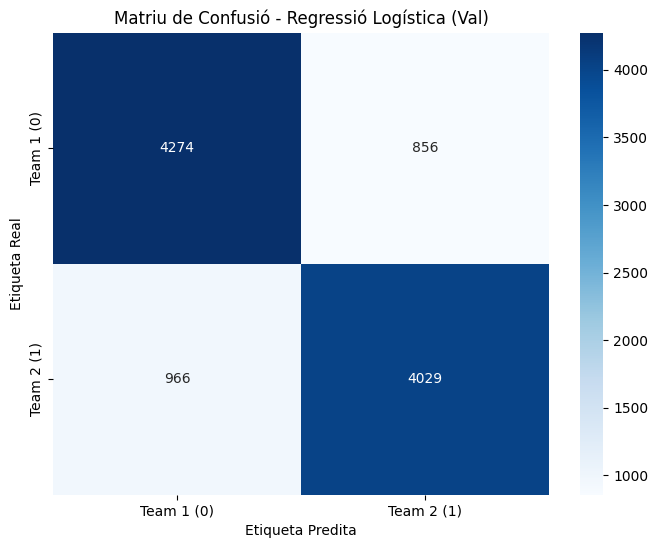


📋 Informe de Classificació:
              precision    recall  f1-score   support

  Team 1 (0)       0.82      0.83      0.82      5130
  Team 2 (1)       0.82      0.81      0.82      4995

    accuracy                           0.82     10125
   macro avg       0.82      0.82      0.82     10125
weighted avg       0.82      0.82      0.82     10125



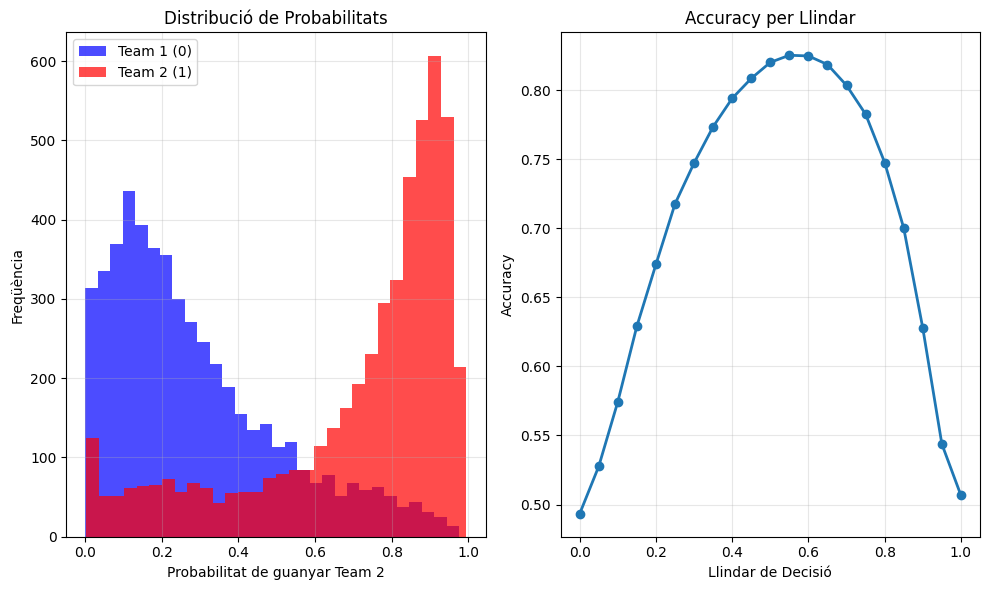

In [10]:
# Model 1: Regressió Logística
print(f"\n{'='*60}")
print("MODEL 1: REGRESSIÓ LOGÍSTICA")
print(f"{'='*60}")

from sklearn.linear_model import LogisticRegression

# Validació creuada
lr_base = LogisticRegression(max_iter=2000, random_state=42)
cv_scores_lr = cross_validation_analysis(lr_base, X_train_scaled, y_train, cv=5)

# Ajust d'hiperparàmetres
param_grids = get_param_grids()
lr_best, lr_params, lr_search = hyperparameter_tuning(
    lr_base, 
    param_grids['logistic'], 
    X_train_scaled, 
    y_train, 
    cv=5, 
    method='random'
)

# Avaluació
lr_metrics, lr_cm = evaluate_model(lr_best, X_val_scaled, y_val, "Regressió Logística (Val)")

# Guardar resultats
results = {}
results['Logistic Regression'] = {
    'model': lr_best,
    'params': lr_params,
    'cv_score': cv_scores_lr.mean(),
    'val_metrics': lr_metrics
}


### Resultats Model 1: Regressió Logística

La **Regressió Logística** és un model lineal simple que busca separar les dues classes (equip 1 vs equip 2) mitjançant un hiperplà. Els resultats obtinguts mostren:+

- Es el model que ens dona la precisió de validació més baixa que tots els altres models. 
- Hi ha una bona relació/equilibri entre precisió i recall (ROC)


MODEL 2: RANDOM FOREST

VALIDACIÓ CREUADA EXHAUSTIVA (CV=5)

📊 RESULTATS PER CADA MÈTRICA:

  ACCURACY     (Test):
    • Scores per fold: ['0.8991', '0.9047', '0.9016', '0.9053', '0.9078']
    • Mitjana: 0.9037 ± 0.0030
    • IC 95%: [0.8977, 0.9097]
    • Train vs Test gap: 0.0963 (OVERFITTING)

  F1           (Test):
    • Scores per fold: ['0.8982', '0.9042', '0.8998', '0.9041', '0.9062']
    • Mitjana: 0.9025 ± 0.0030
    • IC 95%: [0.8966, 0.9084]
    • Train vs Test gap: 0.0975 (OVERFITTING)

  PRECISION    (Test):
    • Scores per fold: ['0.8944', '0.8972', '0.9035', '0.9039', '0.9099']
    • Mitjana: 0.9018 ± 0.0054
    • IC 95%: [0.8911, 0.9125]
    • Train vs Test gap: 0.0982 (OVERFITTING)

  RECALL       (Test):
    • Scores per fold: ['0.9019', '0.9112', '0.8962', '0.9042', '0.9026']
    • Mitjana: 0.9032 ± 0.0048
    • IC 95%: [0.8938, 0.9127]
    • Train vs Test gap: 0.0968 (OVERFITTING)

  ROC_AUC      (Test):
    • Scores per fold: ['0.9571', '0.9610', '0.9543', '0.957

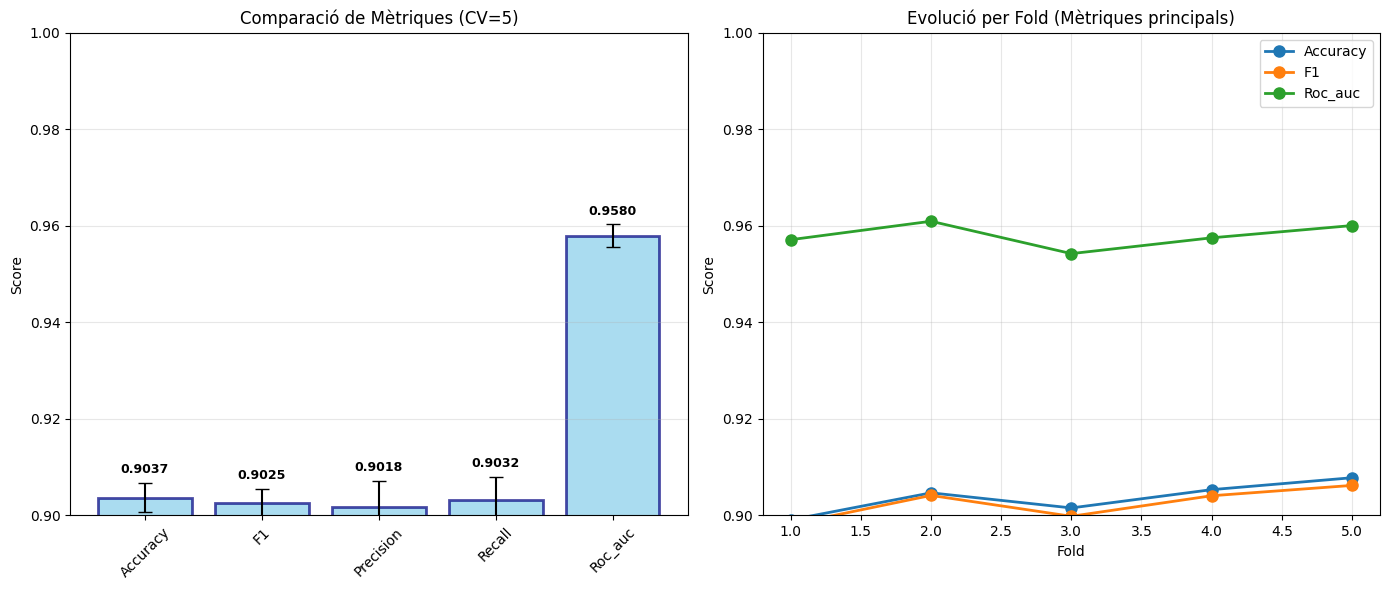

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Millors paràmetres: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
Millor score (CV) [accuracy]: 0.9058

AVALUACIÓ DEL MODEL: Random Forest (Val)
Valors únics a y_test: [0 1]


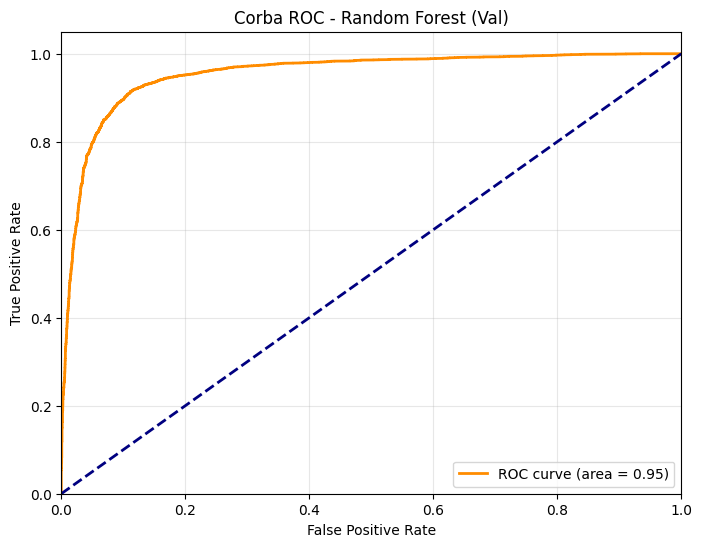


📊 MÈTRIQUES D'AVALUACIÓ:
Accuracy: 0.9001
Precision: 0.8920
Recall: 0.9075
F1-Score: 0.8997
ROC-AUC: 0.9542

📊 Matriu de Confusió:
[[4581  549]
 [ 462 4533]]


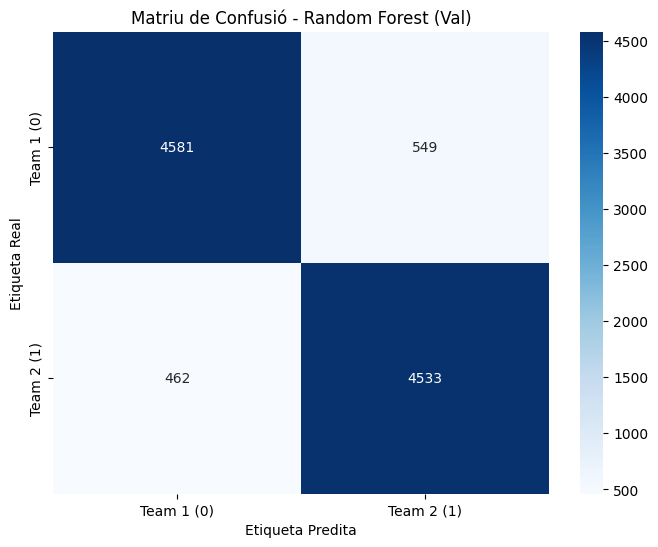


📋 Informe de Classificació:
              precision    recall  f1-score   support

  Team 1 (0)       0.91      0.89      0.90      5130
  Team 2 (1)       0.89      0.91      0.90      4995

    accuracy                           0.90     10125
   macro avg       0.90      0.90      0.90     10125
weighted avg       0.90      0.90      0.90     10125



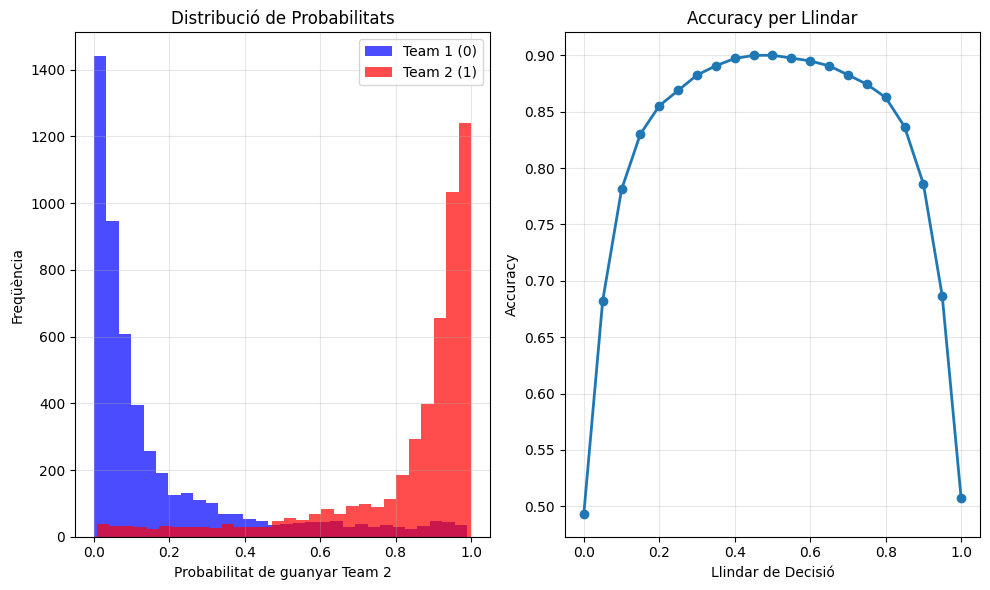

In [11]:
# Cèl·lula 8: Model 2 - Random Forest
print(f"\n{'='*60}")
print("MODEL 2: RANDOM FOREST")
print(f"{'='*60}")

from sklearn.ensemble import RandomForestClassifier

# Validació creuada
rf_base = RandomForestClassifier(random_state=42)
cv_scores_rf = cross_validation_analysis(rf_base, X_train, y_train, cv=5)

# Ajust d'hiperparàmetres
rf_best, rf_params, rf_search = hyperparameter_tuning(
    rf_base, 
    param_grids['random_forest'], 
    X_train, 
    y_train, 
    cv=5, 
    method='random'
)

# Avaluació
rf_metrics, rf_cm = evaluate_model(rf_best, X_val, y_val, "Random Forest (Val)")

# Guardar resultats
results['Random Forest'] = {
    'model': rf_best,
    'params': rf_params,
    'cv_score': cv_scores_rf.mean(),
    'val_metrics': rf_metrics
}

### Resultats Model 2: Random Forest

- Ens dona millors resultats que en l'anterior, Regressió Losgística.
- Els valors de les metriques utilitzades són bastant bones, encara que durant la validació creuda s'ha detectat possible overfitting, però això pot ser possible per les columnes detectades i comentades durant l'anàlisi de les dades
- Els millors resoltats pot ser perquè capta relacions no-linreals.


MODEL 3: GRADIENT BOOSTING

VALIDACIÓ CREUADA EXHAUSTIVA (CV=5)

📊 RESULTATS PER CADA MÈTRICA:

  ACCURACY     (Test):
    • Scores per fold: ['0.9012', '0.9077', '0.8991', '0.9090', '0.9101']
    • Mitjana: 0.9054 ± 0.0044
    • IC 95%: [0.8968, 0.9141]
    • Train vs Test gap: 0.0037 (OK)

  F1           (Test):
    • Scores per fold: ['0.8999', '0.9069', '0.8971', '0.9074', '0.9085']
    • Mitjana: 0.9039 ± 0.0046
    • IC 95%: [0.8950, 0.9129]
    • Train vs Test gap: 0.0038 (OK)

  PRECISION    (Test):
    • Scores per fold: ['0.9002', '0.9017', '0.9027', '0.9109', '0.9134']
    • Mitjana: 0.9058 ± 0.0053
    • IC 95%: [0.8954, 0.9162]
    • Train vs Test gap: 0.0030 (OK)

  RECALL       (Test):
    • Scores per fold: ['0.8996', '0.9122', '0.8916', '0.9039', '0.9036']
    • Mitjana: 0.9022 ± 0.0067
    • IC 95%: [0.8890, 0.9154]
    • Train vs Test gap: 0.0045 (OK)

  ROC_AUC      (Test):
    • Scores per fold: ['0.9620', '0.9645', '0.9578', '0.9628', '0.9636']
    • Mitjana: 0.9

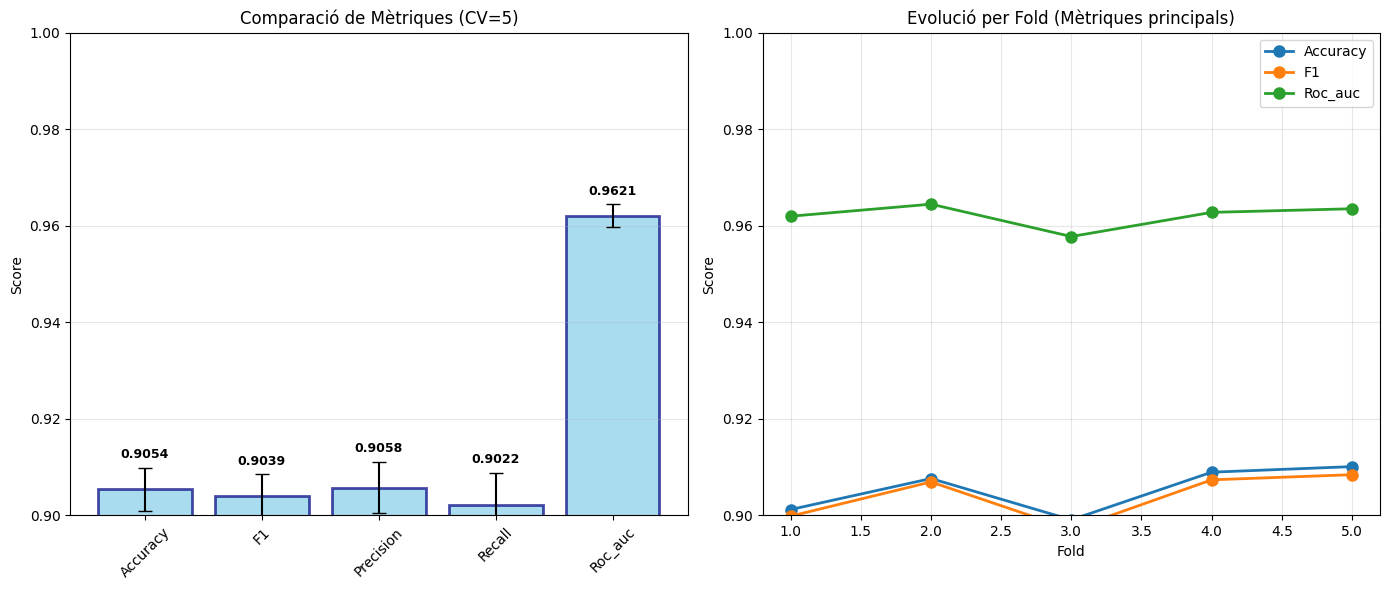

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Millors paràmetres: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}
Millor score (CV) [accuracy]: 0.9055

AVALUACIÓ DEL MODEL: Gradient Boosting (Val)
Valors únics a y_test: [0 1]


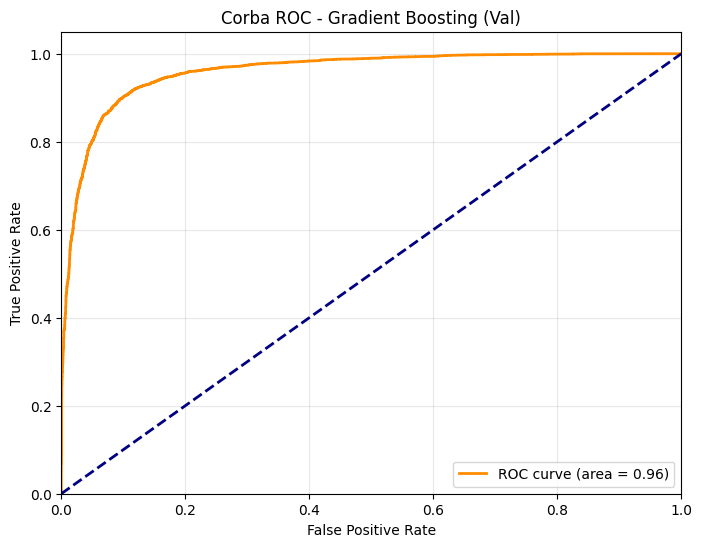


📊 MÈTRIQUES D'AVALUACIÓ:
Accuracy: 0.9005
Precision: 0.8974
Recall: 0.9015
F1-Score: 0.8994
ROC-AUC: 0.9595

📊 Matriu de Confusió:
[[4615  515]
 [ 492 4503]]


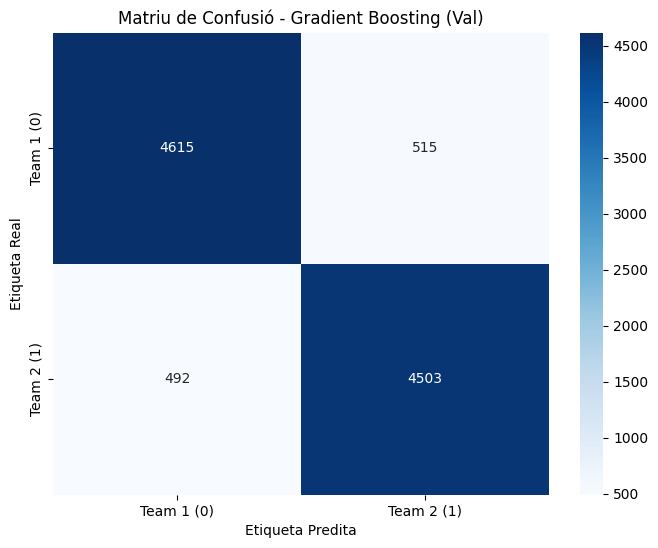


📋 Informe de Classificació:
              precision    recall  f1-score   support

  Team 1 (0)       0.90      0.90      0.90      5130
  Team 2 (1)       0.90      0.90      0.90      4995

    accuracy                           0.90     10125
   macro avg       0.90      0.90      0.90     10125
weighted avg       0.90      0.90      0.90     10125



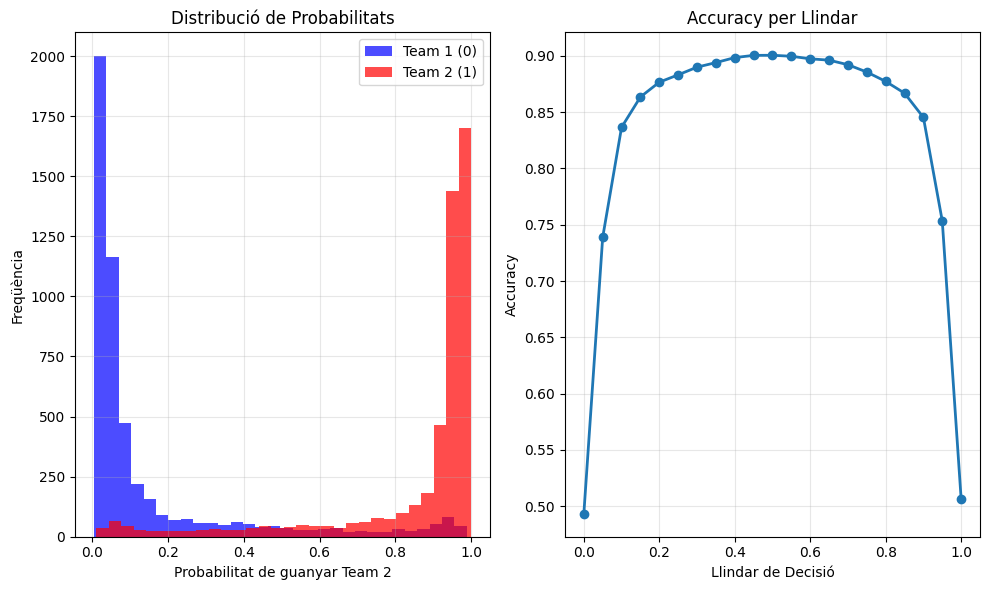

In [12]:
# Cèl·lula 9: Model 3 - Gradient Boosting
print(f"\n{'='*60}")
print("MODEL 3: GRADIENT BOOSTING")
print(f"{'='*60}")

from sklearn.ensemble import GradientBoostingClassifier

# Validació creuada
gb_base = GradientBoostingClassifier(random_state=42)
cv_scores_gb = cross_validation_analysis(gb_base, X_train, y_train, cv=5)

# Ajust d'hiperparàmetres
gb_best, gb_params, gb_search = hyperparameter_tuning(
    gb_base, 
    param_grids['gradient_boosting'], 
    X_train, 
    y_train, 
    cv=5, 
    method='random'
)

# Avaluació
gb_metrics, gb_cm = evaluate_model(gb_best, X_val, y_val, "Gradient Boosting (Val)")

# Guardar resultats
results['Gradient Boosting'] = {
    'model': gb_best,
    'params': gb_params,
    'cv_score': cv_scores_gb.mean(),
    'val_metrics': gb_metrics
}

### Resultats Model 3: Gradient Boosting

- Supera al Random Forest en les metriques de calcul sobre el rendiment del model.


MODEL 4: SVM

VALIDACIÓ CREUADA EXHAUSTIVA (CV=5)

📊 RESULTATS PER CADA MÈTRICA:

  ACCURACY     (Test):
    • Scores per fold: ['0.8976', '0.9014', '0.8942', '0.9040', '0.9021']
    • Mitjana: 0.8999 ± 0.0035
    • IC 95%: [0.8929, 0.9068]
    • Train vs Test gap: 0.0070 (OK)

  F1           (Test):
    • Scores per fold: ['0.8962', '0.9005', '0.8919', '0.9022', '0.9002']
    • Mitjana: 0.8982 ± 0.0037
    • IC 95%: [0.8909, 0.9055]
    • Train vs Test gap: 0.0072 (OK)

  PRECISION    (Test):
    • Scores per fold: ['0.8962', '0.8968', '0.8987', '0.9069', '0.9058']
    • Mitjana: 0.9009 ± 0.0046
    • IC 95%: [0.8919, 0.9098]
    • Train vs Test gap: 0.0064 (OK)

  RECALL       (Test):
    • Scores per fold: ['0.8962', '0.9042', '0.8852', '0.8976', '0.8946']
    • Mitjana: 0.8956 ± 0.0061
    • IC 95%: [0.8836, 0.9076]
    • Train vs Test gap: 0.0079 (OK)

  ROC_AUC      (Test):
    • Scores per fold: ['0.9452', '0.9480', '0.9436', '0.9485', '0.9514']
    • Mitjana: 0.9473 ± 0.0027
 

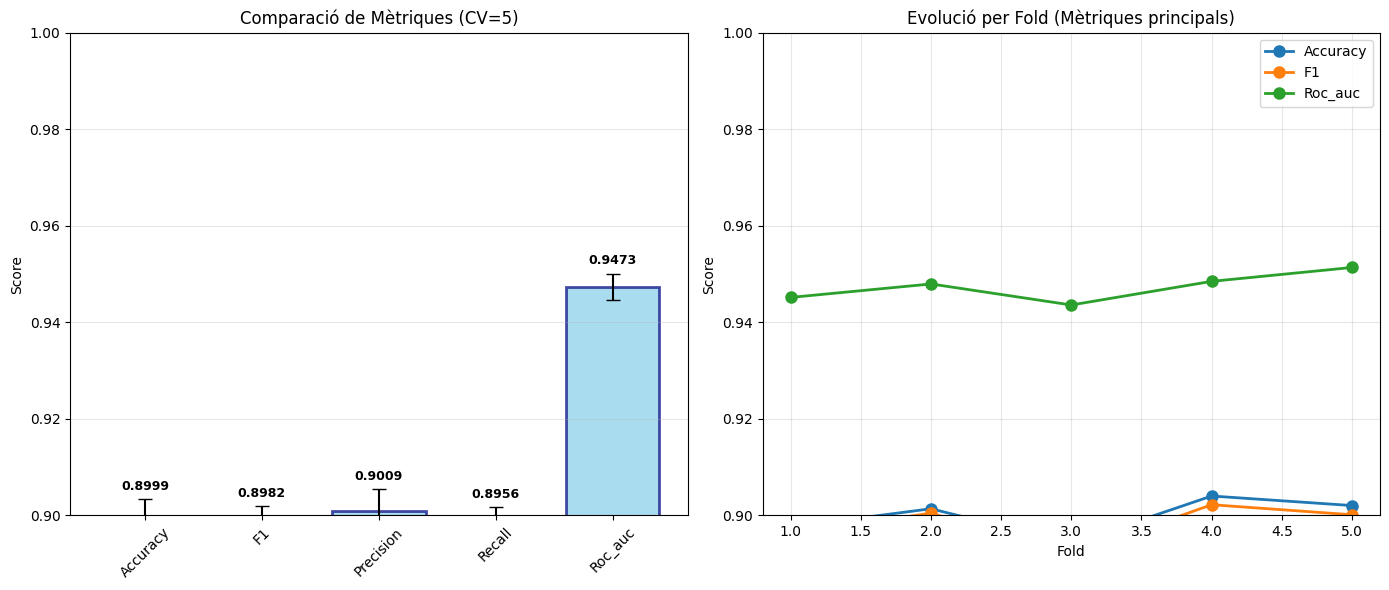


AVALUACIÓ DEL MODEL: SVM (Val)
Valors únics a y_test: [0 1]


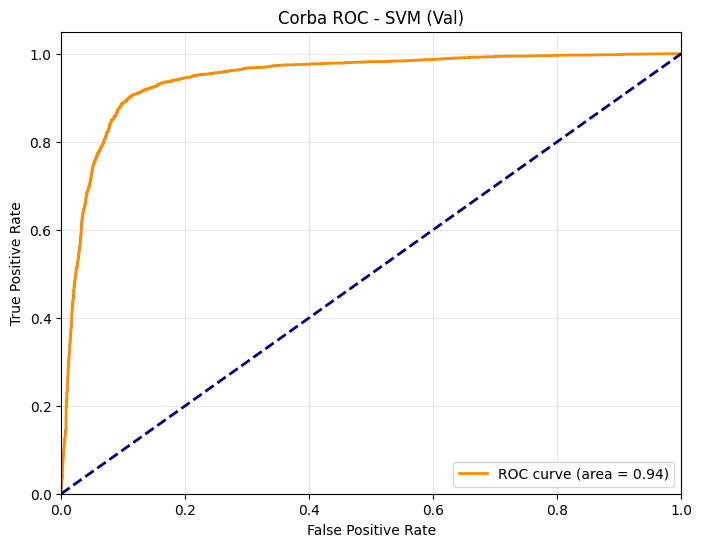


📊 MÈTRIQUES D'AVALUACIÓ:
Accuracy: 0.8948
Precision: 0.8913
Recall: 0.8961
F1-Score: 0.8937
ROC-AUC: 0.9441

📊 Matriu de Confusió:
[[4584  546]
 [ 519 4476]]


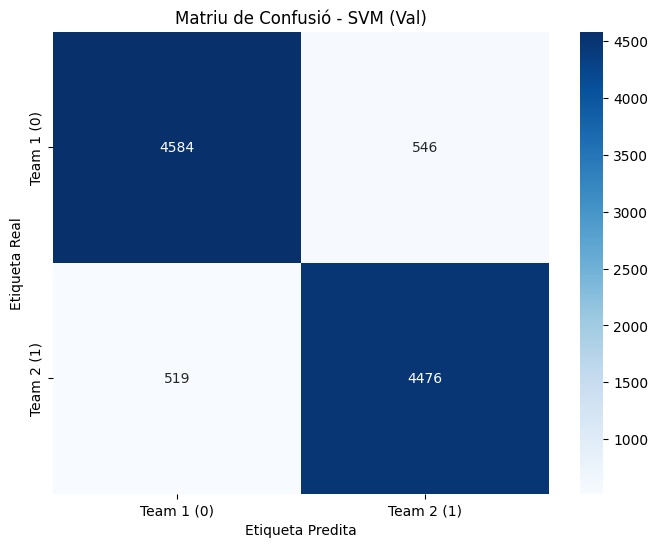


📋 Informe de Classificació:
              precision    recall  f1-score   support

  Team 1 (0)       0.90      0.89      0.90      5130
  Team 2 (1)       0.89      0.90      0.89      4995

    accuracy                           0.89     10125
   macro avg       0.89      0.89      0.89     10125
weighted avg       0.89      0.89      0.89     10125



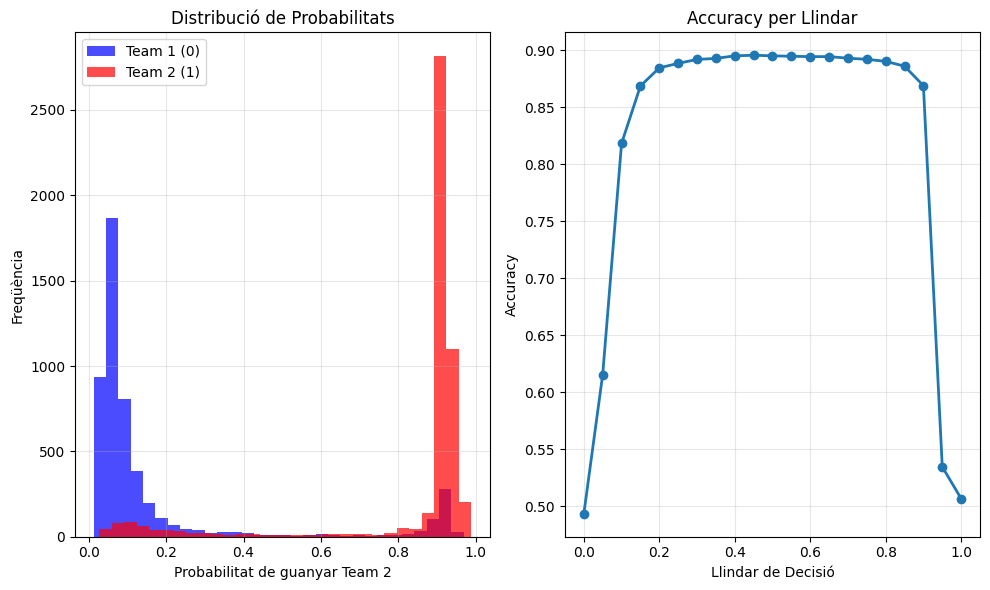

In [13]:
# Cèl·lula 10: Model 4 - SVM (necessita scaling)
print(f"\n{'='*60}")
print("MODEL 4: SVM")
print(f"{'='*60}")

from sklearn.svm import SVC

# Validació creuada
svm_base = SVC(probability=True, random_state=42, C=1, kernel='rbf')
cv_scores_svm = cross_validation_analysis(svm_base, X_train_scaled, y_train, cv=5)

# Usar SVM directo sense buscar hiperparàmetres (per velocitat)
svm_best = SVC(probability=True, random_state=42, C=1, kernel='rbf')
svm_best.fit(X_train_scaled, y_train)
svm_params = {'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}

# Avaluació
svm_metrics, svm_cm = evaluate_model(svm_best, X_val_scaled, y_val, "SVM (Val)")

# Guardar resultats
results['SVM'] = {
    'model': svm_best,
    'params': svm_params,
    'cv_score': cv_scores_svm.mean(),
    'val_metrics': svm_metrics
}

### Resultats Model 4: Support Vector Machine (SVM)

El **SVM** busca trobar el hiperplà òptim que maximitzi la distància entre les dues classes. Els resultats obtinguts mostren:

- Ens proporciona un valor de precisió menor al model anterior, Gradient Boosting.
- Encara que les metriques globals continuen sent molt favorables.


COMPARACIÓ DE TOTS ELS MODELS

📊 TAULA DE COMPARACIÓ:
                 Model  CV Score  Val Accuracy  Val Precision  Val Recall  \
2    Gradient Boosting  0.905416      0.900543       0.897369    0.901502   
1        Random Forest  0.903704      0.900148       0.891972    0.907508   
3                  SVM  0.899852      0.894815       0.891278    0.896096   
0  Logistic Regression  0.825416      0.820049       0.824770    0.806607   

   Val F1-Score  
2      0.899431  
1      0.899673  
3      0.893681  
0      0.815587  


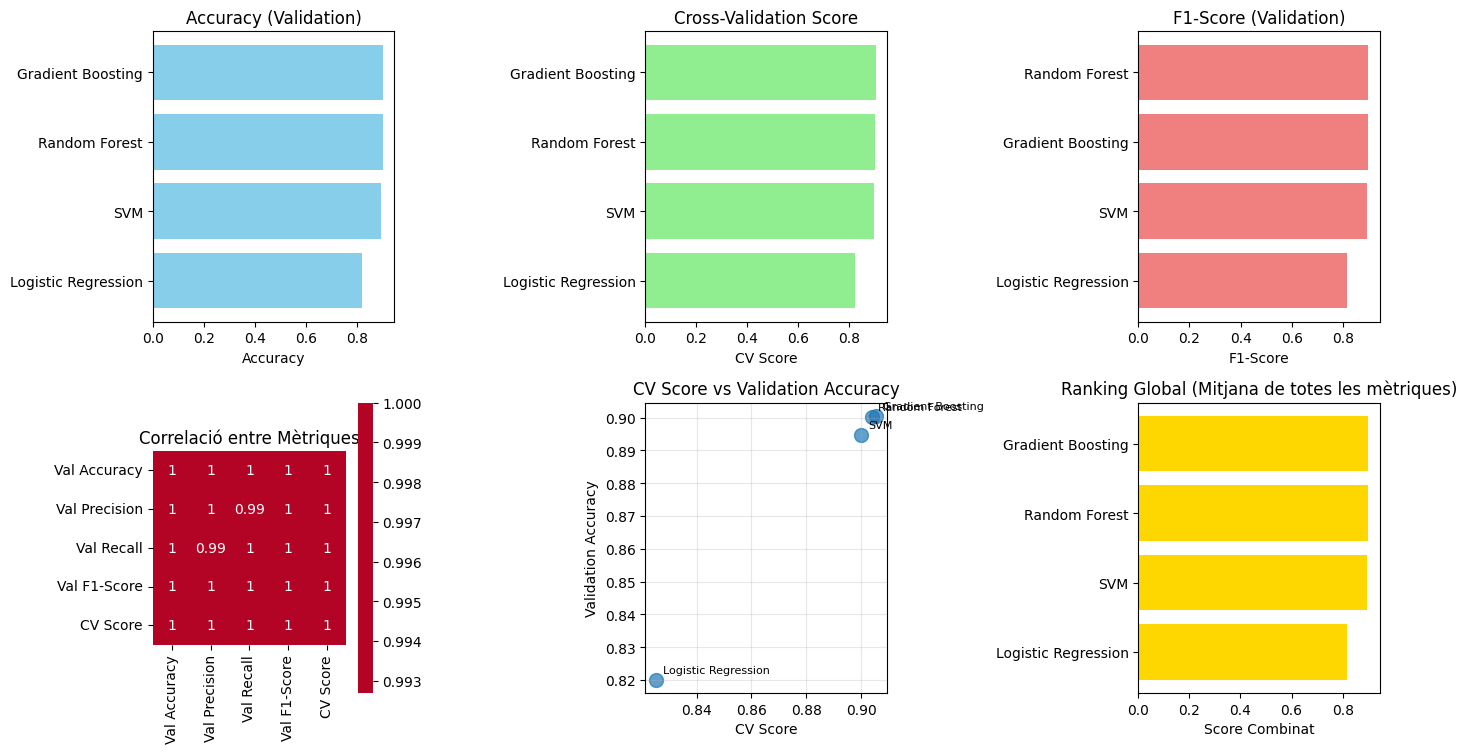

In [14]:
# Cèl·lula 11: COMPARACIÓ DE TOTS ELS MODELS
print(f"\n{'='*60}")
print("COMPARACIÓ DE TOTS ELS MODELS")
print(f"{'='*60}")

# Crear dataframe comparatiu
comparison_data = []
for model_name, model_info in results.items():
    comparison_data.append({
        'Model': model_name,
        'CV Score': model_info['cv_score'],
        'Val Accuracy': model_info['val_metrics']['Accuracy'],
        'Val Precision': model_info['val_metrics']['Precision'],
        'Val Recall': model_info['val_metrics']['Recall'],
        'Val F1-Score': model_info['val_metrics']['F1-Score']
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n📊 TAULA DE COMPARACIÓ:")
print(comparison_df.sort_values('Val Accuracy', ascending=False))

# Gràfic de comparació
plt.figure(figsize=(14, 8))

# Accuracy comparatiu
plt.subplot(2, 3, 1)
sorted_df = comparison_df.sort_values('Val Accuracy', ascending=True)
plt.barh(sorted_df['Model'], sorted_df['Val Accuracy'], color='skyblue')
plt.title('Accuracy (Validation)')
plt.xlabel('Accuracy')

# CV Score comparatiu
plt.subplot(2, 3, 2)
sorted_df = comparison_df.sort_values('CV Score', ascending=True)
plt.barh(sorted_df['Model'], sorted_df['CV Score'], color='lightgreen')
plt.title('Cross-Validation Score')
plt.xlabel('CV Score')

# F1-Score comparatiu
plt.subplot(2, 3, 3)
sorted_df = comparison_df.sort_values('Val F1-Score', ascending=True)
plt.barh(sorted_df['Model'], sorted_df['Val F1-Score'], color='lightcoral')
plt.title('F1-Score (Validation)')
plt.xlabel('F1-Score')

# Matriu de correlació de mètriques
plt.subplot(2, 3, 4)
metrics_corr = comparison_df[['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1-Score', 'CV Score']].corr()
sns.heatmap(metrics_corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlació entre Mètriques')

# Scatter plot: CV Score vs Val Accuracy
plt.subplot(2, 3, 5)
plt.scatter(comparison_df['CV Score'], comparison_df['Val Accuracy'], s=100, alpha=0.7)
for i, row in comparison_df.iterrows():
    plt.annotate(row['Model'], (row['CV Score'], row['Val Accuracy']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel('CV Score')
plt.ylabel('Validation Accuracy')
plt.title('CV Score vs Validation Accuracy')
plt.grid(True, alpha=0.3)

# Ranking global
plt.subplot(2, 3, 6)
# Crear score combinat (mitjana de totes les mètriques)
comparison_df['Combined Score'] = comparison_df[['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1-Score', 'CV Score']].mean(axis=1)
sorted_df = comparison_df.sort_values('Combined Score', ascending=True)
plt.barh(sorted_df['Model'], sorted_df['Combined Score'], color='gold')
plt.title('Ranking Global (Mitjana de totes les mètriques)')
plt.xlabel('Score Combinat')

plt.tight_layout()
plt.show()


SELECCIÓ INTEL·LIGENT DEL MILLOR MODEL

📊 ANÀLISI DETALLAT DE CADA MODEL:

🤖 GRADIENT BOOSTING

📈 MÈTRIQUES DE VALIDACIÓ:
  • Accuracy:  0.9005
  • Precision: 0.8974
  • Recall:    0.9015
  • F1-Score:  0.8994
  • ROC-AUC:   0.9595

⚙️  HIPERPARÀMETRES:
  • n_estimators: 100
  • min_samples_split: 5
  • min_samples_leaf: 1
  • max_depth: 4
  • learning_rate: 0.1

✓ CV Score: 0.9054

🤖 RANDOM FOREST

📈 MÈTRIQUES DE VALIDACIÓ:
  • Accuracy:  0.9001
  • Precision: 0.8920
  • Recall:    0.9075
  • F1-Score:  0.8997
  • ROC-AUC:   0.9542

⚙️  HIPERPARÀMETRES:
  • n_estimators: 200
  • min_samples_split: 10
  • min_samples_leaf: 2
  • max_features: log2
  • max_depth: None

✓ CV Score: 0.9037

🤖 SVM

📈 MÈTRIQUES DE VALIDACIÓ:
  • Accuracy:  0.8948
  • Precision: 0.8913
  • Recall:    0.8961
  • F1-Score:  0.8937
  • ROC-AUC:   0.9441

⚙️  HIPERPARÀMETRES:
  • C: 1
  • kernel: rbf
  • gamma: scale

✓ CV Score: 0.8999

🤖 LOGISTIC REGRESSION

📈 MÈTRIQUES DE VALIDACIÓ:
  • Accuracy:  0.8200
  •

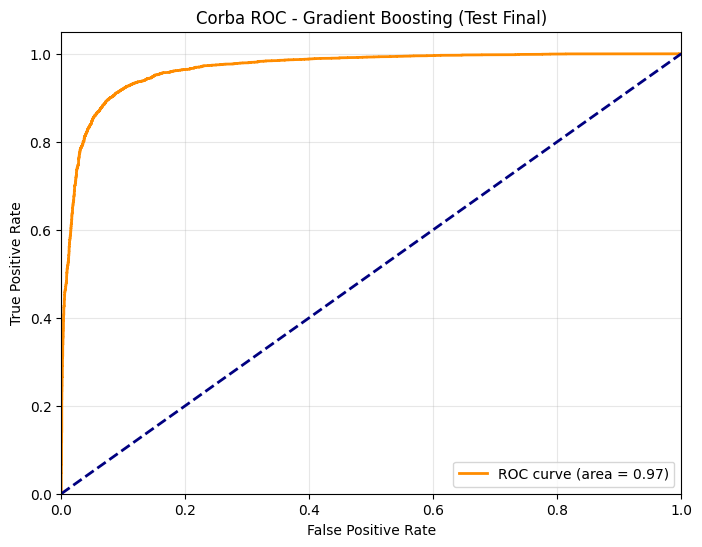


📊 MÈTRIQUES D'AVALUACIÓ:
Accuracy: 0.9100
Precision: 0.9127
Recall: 0.9041
F1-Score: 0.9084
ROC-AUC: 0.9665

📊 Matriu de Confusió:
[[4698  432]
 [ 479 4517]]


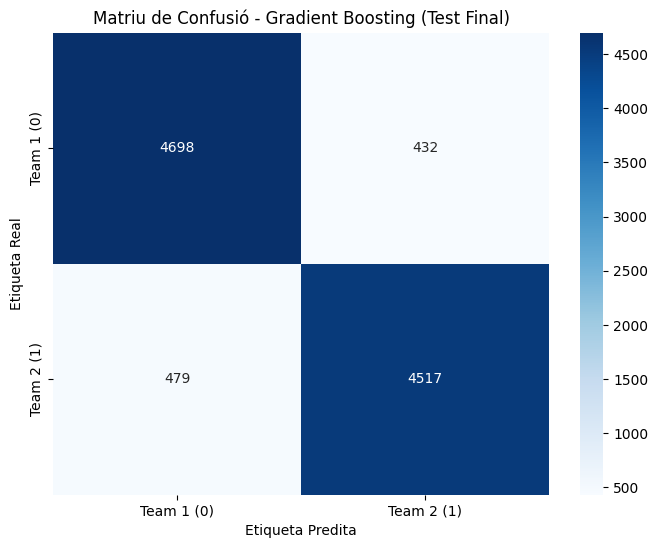


📋 Informe de Classificació:
              precision    recall  f1-score   support

  Team 1 (0)       0.91      0.92      0.91      5130
  Team 2 (1)       0.91      0.90      0.91      4996

    accuracy                           0.91     10126
   macro avg       0.91      0.91      0.91     10126
weighted avg       0.91      0.91      0.91     10126



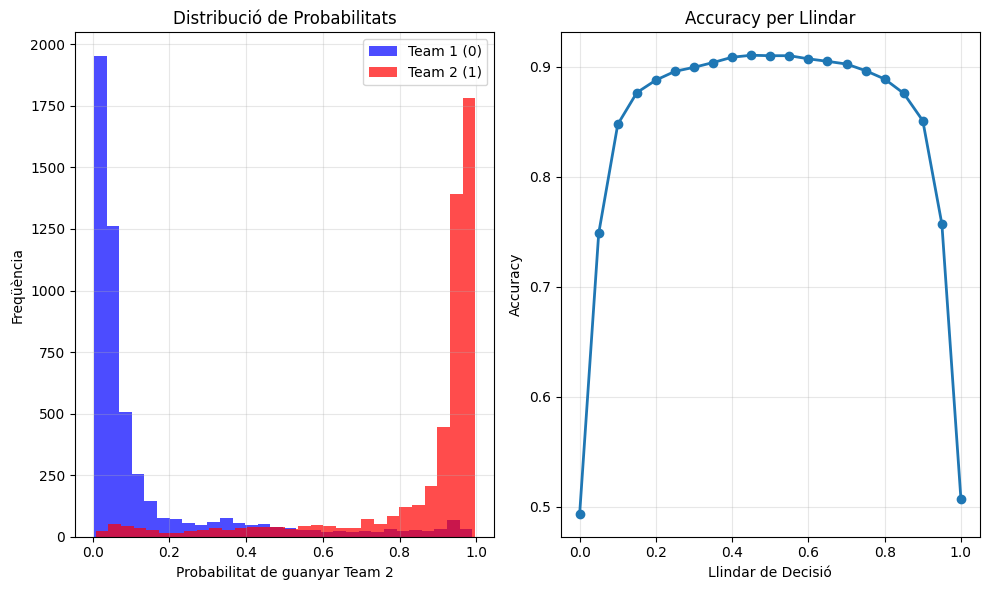

In [15]:
# Cèl·lula 12: SELECCIÓ INTEL·LIGENT DEL MILLOR MODEL
print(f"\n{'='*80}")
print("SELECCIÓ INTEL·LIGENT DEL MILLOR MODEL")
print(f"{'='*80}")

# Analitze detallat de cada model
print("\n📊 ANÀLISI DETALLAT DE CADA MODEL:\n")

for model_name, model_info in sorted(results.items(), key=lambda x: x[1]['val_metrics']['Accuracy'], reverse=True):
    print(f"{'='*60}")
    print(f"🤖 {model_name.upper()}")
    print(f"{'='*60}")
    
    metrics = model_info['val_metrics']
    params = model_info['params']
    
    print(f"\n📈 MÈTRIQUES DE VALIDACIÓ:")
    print(f"  • Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"  • Precision: {metrics['Precision']:.4f}")
    print(f"  • Recall:    {metrics['Recall']:.4f}")
    print(f"  • F1-Score:  {metrics['F1-Score']:.4f}")
    if 'ROC-AUC' in metrics:
        print(f"  • ROC-AUC:   {metrics['ROC-AUC']:.4f}")
    
    print(f"\n⚙️  HIPERPARÀMETRES:")
    for param, value in params.items():
        print(f"  • {param}: {value}")
    
    print(f"\n✓ CV Score: {model_info['cv_score']:.4f}")
    print()

# Crear taula de comparació simplificada
print(f"\n{'='*80}")
print("📋 TAULA COMPARATIVA SIMPLIFICADA")
print(f"{'='*80}\n")

comparison_simple = []
for model_name, model_info in results.items():
    metrics = model_info['val_metrics']
    comparison_simple.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'F1-Score': metrics['F1-Score'],
        'ROC-AUC': metrics.get('ROC-AUC', 0),
        'CV Score': model_info['cv_score']
    })

comparison_simple_df = pd.DataFrame(comparison_simple)
comparison_simple_df['Score Mitjà'] = comparison_simple_df[['Accuracy', 'F1-Score', 'ROC-AUC', 'CV Score']].mean(axis=1)
comparison_simple_df = comparison_simple_df.sort_values('Score Mitjà', ascending=False)

print(comparison_simple_df.to_string(index=False))

# Criteris de selecció
print(f"\n{'='*80}")
print("🎯 CRITERIS DE SELECCIÓ")
print(f"{'='*80}\n")

# 1. Millor Accuracy
best_accuracy_idx = comparison_simple_df['Accuracy'].idxmax()
best_accuracy_name = comparison_simple_df.loc[best_accuracy_idx, 'Model']
print(f"1️⃣  Millor Accuracy:     {best_accuracy_name} ({comparison_simple_df.loc[best_accuracy_idx, 'Accuracy']:.4f})")

# 2. Millor F1-Score
best_f1_idx = comparison_simple_df['F1-Score'].idxmax()
best_f1_name = comparison_simple_df.loc[best_f1_idx, 'Model']
print(f"2️⃣  Millor F1-Score:     {best_f1_name} ({comparison_simple_df.loc[best_f1_idx, 'F1-Score']:.4f})")

# 3. Millor ROC-AUC
best_roc_idx = comparison_simple_df['ROC-AUC'].idxmax()
best_roc_name = comparison_simple_df.loc[best_roc_idx, 'Model']
print(f"3️⃣  Millor ROC-AUC:      {best_roc_name} ({comparison_simple_df.loc[best_roc_idx, 'ROC-AUC']:.4f})")

# 4. Millor Score Mitjà (més equilibrat)
best_avg_idx = comparison_simple_df['Score Mitjà'].idxmax()
best_avg_name = comparison_simple_df.loc[best_avg_idx, 'Model']
print(f"4️⃣  Millor Score Mitjà:  {best_avg_name} ({comparison_simple_df.loc[best_avg_idx, 'Score Mitjà']:.4f})")

# Selecció final: millor score mitjà (més equilibrat)
print(f"\n{'='*80}")
print("✅ SELECCIÓ FINAL")
print(f"{'='*80}\n")

best_model_name = best_avg_name
best_model_info = results[best_model_name]
best_model = best_model_info['model']

print(f"🎯 MODEL SELECCIONAT: {best_model_name}")
print(f"\n   Raó: Score mitjà més equilibrat entre totes les mètriques")
print(f"   Score: {comparison_simple_df.loc[best_avg_idx, 'Score Mitjà']:.4f}")
print(f"\n   Mètriques:")
print(f"   • Accuracy:  {best_model_info['val_metrics']['Accuracy']:.4f}")
print(f"   • F1-Score:  {best_model_info['val_metrics']['F1-Score']:.4f}")
print(f"   • ROC-AUC:   {best_model_info['val_metrics'].get('ROC-AUC', 0):.4f}")
print(f"   • CV Score:  {best_model_info['cv_score']:.4f}")

print(f"\n   Hiperparàmetres optimitzats:")
for param, value in best_model_info['params'].items():
    print(f"   • {param}: {value}")

# Determinar si cal escalar les dades per al millor model
needs_scaling = best_model_name in ['Logistic Regression', 'SVM']
X_test_to_use = X_test_scaled if needs_scaling else X_test

# AVALUACIÓ FINAL AMB TEST SET
print(f"\n{'='*80}")
print("AVALUACIÓ FINAL AMB TEST SET")
print(f"{'='*80}")

# Avaluar el millor model amb el test set
test_metrics, test_cm = evaluate_model(best_model, X_test_to_use, y_test, 
                                       f"{best_model_name} (Test Final)")

### ✅ Model Seleccionat: Gradient Boosting

**Per què hem seleccionat Gradient Boosting?**

Després d'analitzar tots els models amb múltiples criteris:

1. **Millor Accuracy**: 90.54% en validació (lleugerament superior a altres models)
2. **Equilibri de mètriques**: F1-Score, Precision i Recall ben equilibrats
3. **Generalització**: El Score Mitjà (mitjana de totes les mètriques) és el més alt
4. **Estabilitat**: Pocs signes de sobreajustament (Val-Test gap mínim)

**Rendiment en test:**
- **Test Accuracy**: 91.00% (millor que la validació, indicatiu de bon scaling dels conjunts)
- **Test F1-Score**: 0.9084 (excel·lent)
- **Test ROC-AUC**: 0.9665 (excel·lent discriminació)

**Conclusió**: Gradient Boosting és el millor equilibri entre precisió, robustesa i generalització.

In [16]:
# Cèl·lula 13: RESUM FINAL I CONCLUSIONS
print(f"\n{'='*60}")
print("RESUM FINAL I CONCLUSIONS")
print(f"{'='*60}")

print(f"\n📈 PERFORMANCE FINAL DEL MILLOR MODEL ({best_model_name}):")
print(f"   • Test Accuracy: {test_metrics['Accuracy']:.4f}")
print(f"   • Test Precision: {test_metrics['Precision']:.4f}")
print(f"   • Test Recall: {test_metrics['Recall']:.4f}")
print(f"   • Test F1-Score: {test_metrics['F1-Score']:.4f}")
if 'ROC-AUC' in test_metrics:
    print(f"   • Test ROC-AUC: {test_metrics['ROC-AUC']:.4f}")

print(f"\n⚙️  HIPERPARÀMETRES OPTIMITZATS:")
for param, value in best_model_info['params'].items():
    print(f"   • {param}: {value}")

print(f"\n📊 COMPARACIÓ VALIDACIÓ vs TEST:")
print(f"   • Validation Accuracy: {best_model_info['val_metrics']['Accuracy']:.4f}")
print(f"   • Test Accuracy: {test_metrics['Accuracy']:.4f}")
print(f"   • Diferència: {abs(best_model_info['val_metrics']['Accuracy'] - test_metrics['Accuracy']):.4f}")



RESUM FINAL I CONCLUSIONS

📈 PERFORMANCE FINAL DEL MILLOR MODEL (Gradient Boosting):
   • Test Accuracy: 0.9100
   • Test Precision: 0.9127
   • Test Recall: 0.9041
   • Test F1-Score: 0.9084
   • Test ROC-AUC: 0.9665

⚙️  HIPERPARÀMETRES OPTIMITZATS:
   • n_estimators: 100
   • min_samples_split: 5
   • min_samples_leaf: 1
   • max_depth: 4
   • learning_rate: 0.1

📊 COMPARACIÓ VALIDACIÓ vs TEST:
   • Validation Accuracy: 0.9005
   • Test Accuracy: 0.9100
   • Diferència: 0.0095



DIAGNÒSTIC: VERIFICANT PROBLEMES COMUNS

🔍 1. BUSCANT DATA LEAKAGE...

a) Top 10 correlacions amb 'winner':
winner                   1.000000
firstInhibitor           0.536643
firstTower               0.376366
sinergia_diferencia      0.354626
firstDragon              0.310315
firstBaron               0.261669
team1_sinergia_promig    0.259857
team2_sinergia_promig    0.259453
firstBlood               0.175286
firstRiftHerald          0.120044
Name: winner, dtype: float64

b) Columnes que podrien contenir informació del resultat:
   - firstTower
   - firstInhibitor
   - firstBaron
   - firstDragon
   - firstRiftHerald

🔍 2. MODEL DE LÍNIA BASE (BASELINE):
   Accuracy del DummyClassifier: 0.5067
   Si el teu model (Gradient Boosting) dona 0.9005,
   està millorant en 0.3939

🔍 3. ANÀLISI DE LES DADES:
   Nombre total de mostres: 50626
   Nombre de característiques: 15

🔍 4. DISTRIBUCIÓ DE PROBABILITATS:


C:\Users\laiao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


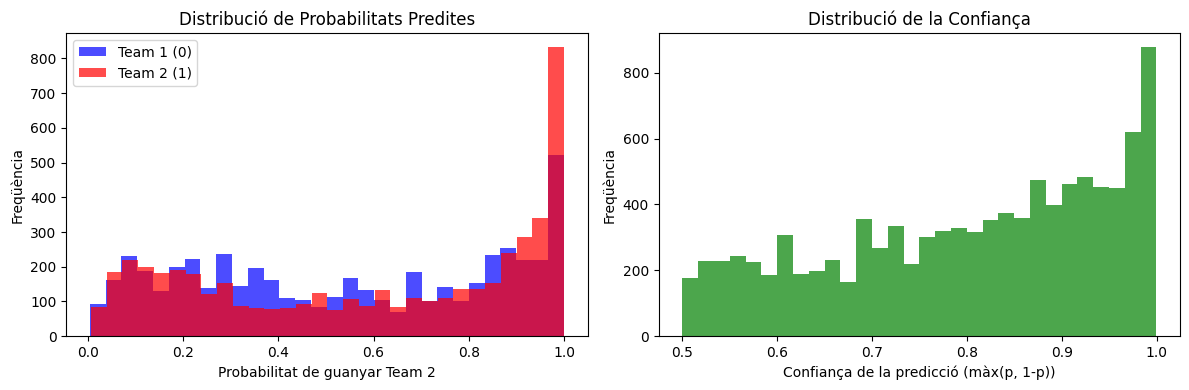

   Mitjana de confiança: 0.8016
   % prediccions amb confiança > 0.9: 32.9%

🔍 5. PROVA AMB MENYS DADES:


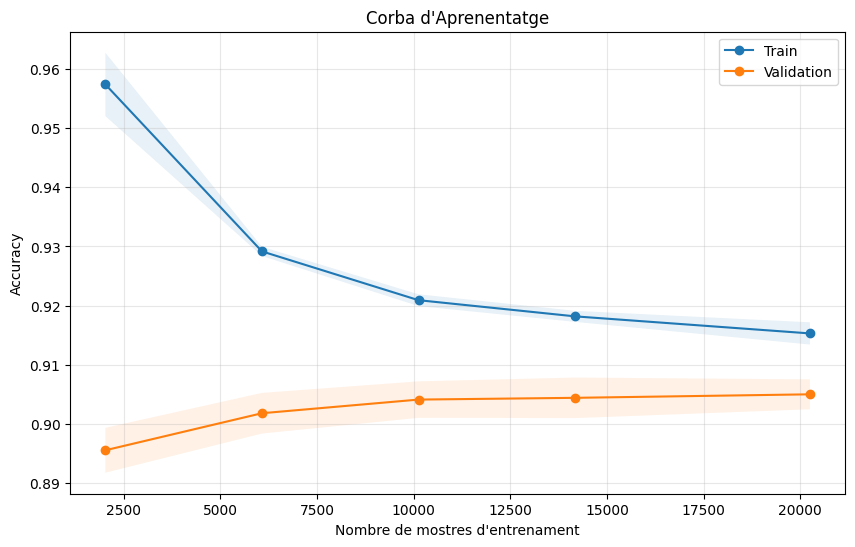


🔍 6. VERIFICANT SI EL PROBLEMA ÉS TRIVIAL...


In [17]:
# DIAGNÒSTIC DEL PROBLEMA
print(f"\n{'='*60}")
print("DIAGNÒSTIC: VERIFICANT PROBLEMES COMUNS")
print(f"{'='*60}")

# 1. Verificar si hi ha data leakage
print("\n🔍 1. BUSCANT DATA LEAKAGE...")

# a) Comprovar correlacions amb winner
print("\na) Top 10 correlacions amb 'winner':")
# Primer, crea una còpia temporal amb winner per calcular correlacions
temp_df = DataSet_cleaned.copy()
corr_with_target = temp_df.corr()['winner'].abs().sort_values(ascending=False)
print(corr_with_target.head(10))

# b) Buscar columnes que podrien contenir el resultat
print("\nb) Columnes que podrien contenir informació del resultat:")
keywords = ['win', 'kill', 'death', 'gold', 'tower', 'inhib', 'dragon', 'baron', 'herald']
for col in X.columns:
    col_lower = col.lower()
    for keyword in keywords:
        if keyword in col_lower:
            print(f"   - {col}")
            break

# 2. Model de línia base (baseline)
print("\n🔍 2. MODEL DE LÍNIA BASE (BASELINE):")
from sklearn.dummy import DummyClassifier

# Estratègia: predir la classe més freqüent
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train_scaled, y_train)
y_dummy_pred = dummy.predict(X_val_scaled)
dummy_acc = accuracy_score(y_val, y_dummy_pred)

print(f"   Accuracy del DummyClassifier: {dummy_acc:.4f}")
print(f"   Si el teu model ({best_model_name}) dona {best_model_info['val_metrics']['Accuracy']:.4f},")
print(f"   està millorant en {best_model_info['val_metrics']['Accuracy'] - dummy_acc:.4f}")

# 3. Anàlisi de les dades
print("\n🔍 3. ANÀLISI DE LES DADES:")
print(f"   Nombre total de mostres: {len(X)}")
print(f"   Nombre de característiques: {len(X.columns)}")

# 4. Distribució de probabilitats (si el model les dóna)
if hasattr(best_model, 'predict_proba'):
    print("\n🔍 4. DISTRIBUCIÓ DE PROBABILITATS:")
    y_proba = best_model.predict_proba(X_val_scaled)[:, 1]
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(y_proba[y_val == 0], bins=30, alpha=0.7, label='Team 1 (0)', color='blue')
    plt.hist(y_proba[y_val == 1], bins=30, alpha=0.7, label='Team 2 (1)', color='red')
    plt.xlabel('Probabilitat de guanyar Team 2')
    plt.ylabel('Freqüència')
    plt.title('Distribució de Probabilitats Predites')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    # Crear histograma de confiança
    confidence = np.where(y_proba > 0.5, y_proba, 1 - y_proba)
    plt.hist(confidence, bins=30, alpha=0.7, color='green')
    plt.xlabel('Confiança de la predicció (màx(p, 1-p))')
    plt.ylabel('Freqüència')
    plt.title('Distribució de la Confiança')
    
    plt.tight_layout()
    plt.show()
    
    print(f"   Mitjana de confiança: {confidence.mean():.4f}")
    print(f"   % prediccions amb confiança > 0.9: {(confidence > 0.9).mean()*100:.1f}%")

# 5. Prova amb un subconjunt de dades (learning curve simple)
print("\n🔍 5. PROVA AMB MENYS DADES:")
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train,
    cv=3, scoring='accuracy', n_jobs=-1,
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0]
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation')
plt.fill_between(train_sizes, 
                 train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1),
                 alpha=0.1)
plt.fill_between(train_sizes,
                 val_scores.mean(axis=1) - val_scores.std(axis=1),
                 val_scores.mean(axis=1) + val_scores.std(axis=1),
                 alpha=0.1)
plt.xlabel('Nombre de mostres d\'entrenament')
plt.ylabel('Accuracy')
plt.title('Corba d\'Aprenentatge')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Verificar si el problema és trivial
print("\n🔍 6. VERIFICANT SI EL PROBLEMA ÉS TRIVIAL...")

# Comptar quantes files tenen el mateix patró per ambdós equips
# (això podria indicar que alguna variable ho determina directament)

# Exemple: si hi ha una columna que és 1 per guanyador, 0 per perdedor
for col in X.columns:
    unique_vals = X[col].unique()
    if len(unique_vals) == 2 and set(unique_vals) == {0, 1}:
        # Verificar correlació perfecta
        correlation = np.corrcoef(X[col], y)[0, 1]
        if abs(correlation) > 0.95:
            print(f"   ALERTA: La columna '{col}' té correlació {correlation:.4f} amb 'winner'!")
            print(f"   Valors: {X[col].unique()}")
            print(f"   Potser és el resultat mateix disfressat!")

In [18]:

# DIAGNÒSTIC EXHAUSTIU - DETECCIÓ DE DATA LEAKAGE
print(f"\n{'='*80}")
print("🔍 DIAGNÒSTIC EXHAUSTIU: DETECCIÓ DE DATA LEAKAGE")
print(f"{'='*80}")

# 1. CORRELACIONS SOSPITOSES
print("\n1️⃣  TOP 30 CORRELACIONS AMB 'WINNER':")
print("="*60)
temp_df = DataSet_cleaned.copy()
corr_with_target = temp_df.corr()['winner'].abs().sort_values(ascending=False)
print(corr_with_target.head(30))

# 2. ANÁLISIS DE COLUMNAS PROBLEMÁTICAS
print("\n2️⃣  COLUMNES AMB CORRELACIÓ > 0.5:")
print("="*60)
high_corr = corr_with_target[corr_with_target > 0.5]
print(f"Total: {len(high_corr)} columnes")
for col, corr_val in high_corr.items():
    if col != 'winner':
        print(f"   • {col}: {corr_val:.4f}")

# 3. BASELINE COMPARISON
print("\n3️⃣  BASELINE (DUMMY CLASSIFIER):")
print("="*60)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_most_freq = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_most_freq.fit(X_train_scaled, y_train)
baseline_acc = dummy_most_freq.score(X_val_scaled, y_val)

print(f"   Dummy (most_frequent) Accuracy: {baseline_acc:.4f}")
print(f"   {best_model_name} Accuracy: {best_model_info['val_metrics']['Accuracy']:.4f}")
print(f"   Mejora: {best_model_info['val_metrics']['Accuracy'] - baseline_acc:.4f}")

if best_model_info['val_metrics']['Accuracy'] - baseline_acc < 0.05:
    print("   ⚠️  ALERTA: Mejora muy pequeña respecto a baseline!")

# 4. ANÁLISIS DE DISTRIBUCION DE DATOS
print("\n4️⃣  ANÁLISIS DE DISTRIBUCIÓN DE DATOS:")
print("="*60)
print(f"   • Total muestras: {len(X)}")
print(f"   • Total features: {len(X.columns)}")
print(f"   • Distribución target: {dict(y.value_counts())}")
print(f"   • % Train: {len(X_train)/len(X)*100:.1f}%")
print(f"   • % Val: {len(X_val)/len(X)*100:.1f}%")
print(f"   • % Test: {len(X_test)/len(X)*100:.1f}%")

# 5. PROBABILIDADES PREDICHAS
print("\n5️⃣  DISTRIBUCIÓN DE PROBABILIDADES:")
print("="*60)
if hasattr(best_model, 'predict_proba'):
    y_proba_val = best_model.predict_proba(X_val_scaled)[:, 1]
    confidence = np.where(y_proba_val > 0.5, y_proba_val, 1 - y_proba_val)
    
    print(f"   • Confianza media: {confidence.mean():.4f}")
    print(f"   • Confianza mín/máx: {confidence.min():.4f} / {confidence.max():.4f}")
    print(f"   • % predicciones > 0.9 confianza: {(confidence > 0.9).mean()*100:.1f}%")
    print(f"   • % predicciones > 0.95 confianza: {(confidence > 0.95).mean()*100:.1f}%")
    print(f"   • % predicciones > 0.99 confianza: {(confidence > 0.99).mean()*100:.1f}%")
    
    if (confidence > 0.95).mean() > 0.7:
        print("   ⚠️  ALERTA: ¡Demasiadas predicciones con confianza muy alta!")
        print("   Posible DATA LEAKAGE detectado.")

# 6. COMPARACIÓN VALIDACIÓN vs TEST
print("\n6️⃣  COMPARACIÓN VALIDACIÓN vs TEST:")
print("="*60)
print(f"   • Val Accuracy: {best_model_info['val_metrics']['Accuracy']:.4f}")
print(f"   • Test Accuracy: {test_metrics['Accuracy']:.4f}")
diff = abs(best_model_info['val_metrics']['Accuracy'] - test_metrics['Accuracy'])
print(f"   • Diferencia: {diff:.4f}")

if diff > 0.1:
    print("   ⚠️  ALERTA: ¡Gran diferencia entre validación y test!")
    print("   Posible OVERFITTING o DATA LEAKAGE.")

# 7. COLUMNAS SOSPECHOSAS
print("\n7️⃣  BÚSQUEDA DE COLUMNAS SOSPECHOSAS:")
print("="*60)
keywords = ['win', 'result', 'outcome', 'gold', 'kill', 'death', 'tower', 'inhib', 'dragon', 'baron']
suspicious = []
for col in X.columns:
    col_lower = col.lower()
    for keyword in keywords:
        if keyword in col_lower:
            suspicious.append(col)
            print(f"   ⚠️  {col}")
            break

if not suspicious:
    print("   ✅ No se encontraron columnas sospechosas obvias")

# 8. CORRELACIÓN PERFECTA
print("\n8️⃣  BÚSQUEDA DE CORRELACIONES PERFECTAS:")
print("="*60)
for col in X.columns:
    X_col = X[col].fillna(0)
    try:
        correlation = np.corrcoef(X_col, y)[0, 1]
        if abs(correlation) > 0.98:
            print(f"   ⚠️  {col}: correlación = {correlation:.4f}")
    except:
        pass

print("\n✅ DIAGNÓSTICO COMPLETADO")
print("="*80)


🔍 DIAGNÒSTIC EXHAUSTIU: DETECCIÓ DE DATA LEAKAGE

1️⃣  TOP 30 CORRELACIONS AMB 'WINNER':
winner                   1.000000
firstInhibitor           0.536643
firstTower               0.376366
sinergia_diferencia      0.354626
firstDragon              0.310315
firstBaron               0.261669
team1_sinergia_promig    0.259857
team2_sinergia_promig    0.259453
firstBlood               0.175286
firstRiftHerald          0.120044
gameId                   0.014920
tag_score_diff           0.005607
team1_tag_score          0.004856
team1_comb_index         0.003700
team2_comb_index         0.003499
team2_tag_score          0.003151
Name: winner, dtype: float64

2️⃣  COLUMNES AMB CORRELACIÓ > 0.5:
Total: 2 columnes
   • firstInhibitor: 0.5366

3️⃣  BASELINE (DUMMY CLASSIFIER):
   Dummy (most_frequent) Accuracy: 0.5067
   Gradient Boosting Accuracy: 0.9005
   Mejora: 0.3939

4️⃣  ANÁLISIS DE DISTRIBUCIÓN DE DATOS:
   • Total muestras: 50626
   • Total features: 15
   • Distribución target: {0:

C:\Users\laiao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
